<div style="position: relative; text-align: right;">
<img src="https://user-images.githubusercontent.com/7065401/98614301-dcf01780-22d6-11eb-9c8f-65ebfceac6f6.png" style="width: 130px; display: inline-block;"></img>

<img src="https://user-images.githubusercontent.com/7065401/98864025-08deda80-2448-11eb-9600-22aa17884cdf.png" style="height: 100%; max-height: inherit; position: absolute; top: 20%; left: 0px;"></img>
<br>

<h2 style="font-weight: bold;">
    Kristin Day
</h2>

<h3 style="color: #ef7d22; margin-top: 0.8em">
    Data Scientist
</h3>
<hr>
<br><br>

<p style="font-size: 80%; text-align: right; margin: 10px 0px;">
    yokristinday@gmail.com
</p>
<p style="font-size: 80%; text-align: right; margin: 10px 0px;">
    linkedin.com/in/kristin-day-300306a9
</p>

</div>

<br><br><br>

<div style="position: relative;">
<img src="https://user-images.githubusercontent.com/7065401/98728503-5ab82f80-2378-11eb-9c79-adeb308fc647.png"></img>

<h3 style="color: white; position: absolute; top:30%; left:10%;">
    Decision Trees
</h3>
<h1 style="color: white; position: absolute; top:35%; left:10%;">
    Boston House Prices Regression
</h1>

<h3 style="color: #ef7d22; font-weight: normal; position: absolute; top:43%; left:10%;">
    Kristin Day
</h3>
</div>

<div style="width: 100%; background-color: #ef7d22; text-align: center">
<br><br>

<h1 style="color: white; font-weight: bold;">
    Predict the prices of houses in Boston
</h1>


<br><br>
</div>

![boston-housing](https://user-images.githubusercontent.com/7065401/112419797-ca68fe80-8d0a-11eb-8f18-03381a6a1de8.png)

<hr>

In [ ]:
import pickle

import matplotlib.pyplot as plt
import pandas as pd

from dtreeviz.trees import dtreeviz
import graphviz
from IPython.display import Image

from sklearn import datasets
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.preprocessing import LabelEncoder
import pydotplus
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor,plot_tree

import warnings
warnings.filterwarnings('ignore')

# Step 1: Pull in your data

In [ ]:
# Pull in your data
boston = datasets.load_boston()
X = boston.data
y = boston.target

In [ ]:
features = [str(f) for f in boston.feature_names]
print(features)

# Step 2: Split data into train and test data

In [ ]:
# Split data into test and train
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state = 42)
len(X_train),len(X_test)

(404, 102)

# Step 3: Instantiate your machine learning class

In [ ]:
# This is where you set hyperparameters for model tuning
# Create a hyperparameter distribution like we did in the lessons
depth_list = [d for d in range(2,10)]+[None]
param_dist = {'max_depth':depth_list,
              'min_samples_leaf':range(2,10),
              'min_samples_split':range(2,10,2)}

# Instantiate a decision tree regressor using criterion='mse' and set a random state
regressor = DecisionTreeRegressor(
    criterion='mse',
    random_state=42)

# Instantiate a RandomSearchCV instance
tree_cv = RandomizedSearchCV(regressor,param_dist,cv=6,random_state=42)

# Fit the random search instance on train data
tree_cv.fit(X_train,y_train)

# Save the hyperparameters to a dictionary
best_hps = tree_cv.best_params_
best_hps

{'min_samples_split': 4, 'min_samples_leaf': 7, 'max_depth': 7}

In [ ]:
# Use the best hyperparameters to instantiate a new regressor instance
regressor = DecisionTreeRegressor(
    criterion='mse',
    random_state=42,
    min_samples_split=best_hps['min_samples_split'],
    min_samples_leaf=best_hps['min_samples_leaf'],
    max_depth=best_hps['max_depth'])

# Step 4: Fit the model on your training data

In [ ]:
# Fit the classifier to the train data
regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=7, min_samples_split=4,
                      random_state=42)

# Step 5: Make predictions on the train and test data

In [ ]:
# Now we need can test how well the model works on unseen data using the test set
# Predict on the train data
y_pred_train = regressor.predict(X_train)
# Predict on the test data
y_pred_test = regressor.predict(X_test)

# Step 6: Evaluate model performance

In [ ]:
# Get the baseline accuracy - for continuous targets that means always predicting the training mean
# Look at the training mean
y_train.mean()

# Get the mean_absolute_error of predicting the mean
mean_absolute_error(y_test,[y_train.mean()]*len(y_test))

In [ ]:
# Calculate training error
mean_absolute_error(y_train,y_pred_train)

2.165651190119012

In [ ]:
# Calculate testing error
mean_absolute_error(y_test,y_pred_test)

2.8526070787792244

# Step 7: Cost-Complexity Pruning

In [ ]:
# Get a list of alphas to test
path = regressor.cost_complexity_pruning_path(X_train,y_train)
# path has a ccp_alphas attribute and an impurities attribute
path.ccp_alphas

array([0.00000000e+00, 2.10403406e-02, 4.61900047e-02, 8.26337759e-02,
       1.00991867e-01, 1.06458218e-01, 1.14429776e-01, 1.18900211e-01,
       1.30429443e-01, 1.39417675e-01, 1.63821879e-01, 1.85479137e-01,
       1.87910500e-01, 2.64292321e-01, 2.81162123e-01, 2.84152174e-01,
       2.89161716e-01, 3.13858482e-01, 3.20241115e-01, 4.10500986e-01,
       4.92822179e-01, 6.70218676e-01, 7.87820759e-01, 8.60896040e-01,
       8.96166476e-01, 1.04808356e+00, 2.16662832e+00, 3.16596443e+00,
       5.94515856e+00, 1.44201615e+01, 4.08534465e+01])

In [ ]:
# Get a list of models for each alpha
models = list()
for ccp_alpha in path.ccp_alphas:
    reg_temp = DecisionTreeRegressor(criterion='mse',random_state=42,ccp_alpha=ccp_alpha)
    reg_temp.fit(X_train,y_train)
    models.append(reg_temp)

In [ ]:
# We know we never want a tree with one node.  We will always remove this model which is the last tree/alpha
ccp_alphas = path.ccp_alphas[:-1]
models = models[:-1]

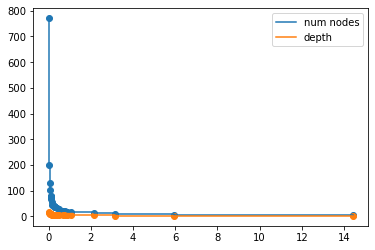

In [ ]:
# Plot the number of nodes and depth for each model with the corresponding alpha
node_counts = [reg_temp.tree_.node_count for reg_temp in models]
depths = [reg_temp.tree_.max_depth for reg_temp in models]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depths)
plt.plot(ccp_alphas,node_counts,label='num nodes',drawstyle='steps-post')
plt.plot(ccp_alphas,depths,label='depth',drawstyle='steps-post')
plt.legend()
plt.show()

In [ ]:
# Visualize our train and test accuracy with different values of alpha
# Get lists of training errors and testing errors
train_err = list()
test_err = list()
for reg_temp in models:
    y_pred_train = reg_temp.predict(X_train)
    y_pred_test = reg_temp.predict(X_test)
    train_err.append(mean_absolute_error(y_pred_train,y_train))
    test_err.append(mean_absolute_error(y_pred_test,y_test))

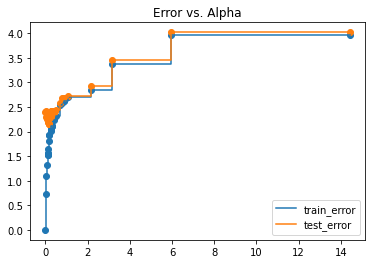

In [ ]:
# Plot the errors with corresponding alphas
plt.scatter(ccp_alphas,train_err)
plt.scatter(ccp_alphas,test_err)
plt.plot(ccp_alphas,train_err,label='train_error',drawstyle='steps-post')
plt.plot(ccp_alphas,test_err,label='test_error',drawstyle='steps-post')
plt.legend()
plt.title('Error vs. Alpha')
plt.show()

In [ ]:
# Print the errors with the alphas - look for the lowest error and choose that alpha as the best
# You can do this visually or with a loop
for err,alpha in zip(test_err,ccp_alphas):
    print(err,alpha)

2.394117647058824 0.0
2.4225708976401013 0.021040340641206162
2.303433529017439 0.046190004714779964
2.254265500694999 0.08263377587762605
2.228275037160907 0.10099186704384328
2.228275037160907 0.10645821806456479
2.205326598526194 0.11442977631096801
2.205326598526194 0.11890021148423102
2.2324686068446726 0.13042944294431785
2.196839878207175 0.13941767510076908
2.1464174261322464 0.1638218788984283
2.1473705851736407 0.18547913719943332
2.1473705851736407 0.1879105002605846
2.3058309763151517 0.26429232149400983
2.354981146750152 0.2811621227912404
2.4157267943585445 0.28415217445168955
2.4157267943585445 0.2891617161716385
2.4157267943585445 0.3138584821716801
2.4157267943585445 0.3202411151479967
2.3773044866018718 0.41050098626321896
2.433964150467418 0.49282217892836555
2.5875625082436216 0.6702186759748963
2.690833266686794 0.7878207585795189
2.6777437065384104 0.860896039603976
2.6777437065384104 0.8961664762499013
2.7319103732050767 1.0480835625855347
2.9295239552232495 2.16

In [ ]:
# Option for choosing the lowest with a loop
best_alpha = None
lowest_err = 1000
for err,alpha in zip(test_err,ccp_alphas):
    if err < lowest_err:
        lowest_err = err
        best_alpha = alpha
print(lowest_err,best_alpha)

2.1464174261322464 0.1638218788984283


In [ ]:
# Instantiate a new regressor with the best hyperparameters and the best alpha
regressor = DecisionTreeRegressor(
    criterion='mse',
    random_state=42,
    min_samples_split=best_hps['min_samples_split'],
    min_samples_leaf=best_hps['min_samples_leaf'],
    max_depth=best_hps['max_depth'],
    ccp_alpha=best_alpha)

In [ ]:
# Fit the regressor to the train data
regressor.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.1638218788984283, max_depth=7,
                      min_samples_leaf=7, min_samples_split=4, random_state=42)

In [ ]:
# Predict on train and test to see new model scores
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

In [ ]:
# New training error
mean_absolute_error(y_pred_train,y_train)

2.3969763151850176

In [ ]:
# New testing error
mean_absolute_error(y_pred_test,y_test)

2.8273599933300657

## We have improved our testing error - the old score was ~2.85 and the new score is ~2.83

In [ ]:
# Write out your model and data to use in the next project - Visualization
pickle.dump(regressor,open('data/reg_model.pkl','wb'))
pd.DataFrame(X_train).to_csv('data/boston_X_train.csv',index=False)
pd.DataFrame(y_train).to_csv('data/boston_y_train.csv',index=False)
with open('data/boston_features.txt','w') as f:
    feat_str = ','.join(features)
    print(feat_str)
    f.write(feat_str)

CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT


<div style="position: relative;">
<img src="https://user-images.githubusercontent.com/7065401/98729912-57be3e80-237a-11eb-80e4-233ac344b391.png"></img>
</div>